In [2]:
# importing libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

Dataset Loading

In [5]:
df = pd.read_csv("../csvs/hog_95/extracted_features_hog_95.csv",header =None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3239,3240,3241,3242,3243,3244,3245,3246,3247,3248
0,Rachel_Leigh_Cook,0.101289,1.330157,-0.964354,0.278769,-0.543510,1.725658,-0.641089,-0.416891,-0.197742,...,52.0,689.0,2015.0,543.0,19.0,301.0,450.0,355.0,289.0,11011.0
1,Roseanne_Barr,0.391125,0.704784,1.217563,-0.780129,-1.414380,0.959051,1.196409,1.637598,0.144761,...,44.0,654.0,1721.0,548.0,26.0,416.0,510.0,451.0,378.0,7875.0
2,Vladimir_Putin,-1.246895,-0.680080,0.591671,-2.354134,-1.920589,-0.013368,0.060721,-0.179192,1.438939,...,35.0,504.0,3792.0,564.0,27.0,420.0,679.0,460.0,611.0,17388.0
3,Carlos_Menem,0.597257,-0.661087,1.356273,-0.878202,-0.588220,-0.435263,-0.077499,-0.152108,0.537329,...,53.0,495.0,1593.0,566.0,34.0,343.0,563.0,399.0,338.0,9557.0
4,Lynne_Thigpen,-1.589231,-0.049223,-1.306154,-0.461846,0.250779,-2.198609,-0.026885,0.607296,-0.321626,...,39.0,520.0,1744.0,502.0,24.0,339.0,531.0,398.0,394.0,14844.0


In [6]:
# Since, we want to filter images, we are concatenating records again
df_test = pd.read_csv("../csvs/hog_95/extracted_features_test_hog_95.csv",header=None)
df = pd.concat([df,df_test],axis = 0,ignore_index=True)

In [7]:
# Info printed
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13233 entries, 0 to 13232
Columns: 3249 entries, 0 to 3248
dtypes: float64(3248), object(1)
memory usage: 328.0+ MB
None


##### Restricting the minimum no of samples per class to be 50

In [8]:
df_modified_50 = df[df[0].map(df[0].value_counts()) >= 50]
# Reference Stack overflow

In [9]:
df_modified_50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1560 entries, 6 to 13227
Columns: 3249 entries, 0 to 3248
dtypes: float64(3248), object(1)
memory usage: 38.7+ MB


In [10]:
# No of unique classes in the dataFrame now
df_modified_50[0].unique().shape

(12,)

In [11]:
# Getting the features and target
Features = df_modified_50.drop(0,axis = 1)
print(Features.shape)

target = df_modified_50[0]
print(target.shape)

(1560, 3248)
(1560,)


Separating Features out for separate testing

In [12]:
# Extrating particular features
Features_HoG_95 = Features.loc[:,:946]
Features_CNN = Features.loc[:,946:2993]
Features_LBP = Features.loc[:,2993:]

In [13]:
print("No of CNN features: ",Features_CNN.shape[1])
print("No of HoG features covering 0.95 variance: ",Features_HoG_95.shape[1])
print("No of LBP Features are: ",Features_LBP.shape[1])

No of CNN features:  2048
No of HoG features covering 0.95 variance:  946
No of LBP Features are:  256


Default Hyperparameters training on LBP Features

In [14]:
X_train_LBP, X_test_LBP, y_train_LBP,y_test_LBP = train_test_split(Features_LBP,target,train_size=0.8,random_state=42)

In [15]:
#Normalising the data

scaler=StandardScaler()
X_train_arr=X_train_LBP.values
X_test_arr=X_test_LBP.values
X_train_arr_n=scaler.fit_transform(X_train_arr)
X_test_arr_n = scaler.transform(X_test_arr)
X_train_LBP = pd.DataFrame(X_train_arr_n)
X_test_LBP = pd.DataFrame(X_test_arr_n)

In [16]:
model_LBP_default = RandomForestClassifier()

In [17]:
model_LBP_default.fit(X_train_LBP,y_train_LBP)

RandomForestClassifier()

In [18]:
y_predicted_LBP = model_LBP_default.predict(X_test_LBP)

In [19]:
print("Accuracy",accuracy_score(y_true=y_test_LBP,y_pred=y_predicted_LBP))

Accuracy 0.34294871794871795


Default Hyperparameters training on CNN features

In [20]:
X_train_CNN,X_test_CNN,y_train_CNN,y_test_CNN = train_test_split(Features_CNN,target,train_size=0.8,random_state=42)

In [21]:
#Normalising the data

scaler=StandardScaler()
X_train_arr=X_train_CNN.values
X_test_arr=X_test_CNN.values
X_train_arr_n=scaler.fit_transform(X_train_arr)
X_test_arr_n = scaler.transform(X_test_arr)
X_train_CNN = pd.DataFrame(X_train_arr_n)
X_test_CNN = pd.DataFrame(X_test_arr_n)

In [22]:
model_CNN_default = RandomForestClassifier()

In [23]:
model_CNN_default.fit(X_train_CNN,y_train_CNN)

RandomForestClassifier()

In [24]:
y_predicted_CNN = model_CNN_default.predict(X_test_CNN)

In [25]:
print(accuracy_score(y_true=y_test_CNN,y_pred=y_predicted_CNN))

0.48717948717948717


Default Hyperparameters training using HoG Features

In [26]:
X_train_HoG,X_test_HoG,y_train_HoG,y_test_HoG = train_test_split(Features_HoG_95,target,train_size=0.8,random_state=42)

In [27]:
#Normalising the data

scaler=StandardScaler()
X_train_arr=X_train_HoG.values
X_test_arr=X_test_HoG.values
X_train_arr_n=scaler.fit_transform(X_train_arr)
X_test_arr_n = scaler.transform(X_test_arr)
X_train_HoG = pd.DataFrame(X_train_arr_n)
X_test_HoG = pd.DataFrame(X_test_arr_n)

In [28]:
model_HoG_default = RandomForestClassifier()

In [29]:
model_HoG_default.fit(X_train_HoG,y_train_HoG)

RandomForestClassifier()

In [30]:
y_predicted_HoG = model_HoG_default.predict(X_test_HoG)

In [31]:
print(accuracy_score(y_true=y_test_HoG,y_pred=y_predicted_HoG))

0.34615384615384615


Concatenating all features and training model

In [32]:
X_train_50,X_test_50,y_train_50,y_test_50 = train_test_split(Features,target,train_size=0.8,random_state=42)

In [33]:
#Normalising the data

scaler=StandardScaler()
X_train_arr=X_train_50.values
X_test_arr=X_test_50.values
X_train_arr_n=scaler.fit_transform(X_train_arr)
X_test_arr_n = scaler.transform(X_test_arr)
X_train_50 = pd.DataFrame(X_train_arr_n)
X_test_50 = pd.DataFrame(X_test_arr_n)

In [34]:
X_train_50,X_validate_50,y_train_50,y_validate_50 = train_test_split(X_train_50,y_train_50,train_size=7/8,random_state=42)

In [35]:
model_ALL_default = RandomForestClassifier()
model_ALL_default.fit(X_train_50,y_train_50)
y_predicted_ALL_50 = model_ALL_default.predict(X_validate_50)
print("Default Accuracy ",accuracy_score(y_true=y_validate_50,y_pred=y_predicted_ALL_50))

Default Accuracy  0.47435897435897434


##### Hyper parameter range identification

In [38]:
# for max depth tuning
accuracies_max_depth_tuning = []
best_model = None
max_accuracy = 0
max_depth = [100,200,500,1000,1050,1100,1500,2000,2500,3000]
for depth in max_depth:

    model = RandomForestClassifier(max_depth=depth)
    model.fit(X_train_50,y_train_50)
    y_pred = model.predict(X_validate_50)

    accuracy = accuracy_score(y_pred=y_pred,y_true=y_validate_50)
    print("Accuracy with ",depth,' ',accuracy)

    accuracies_max_depth_tuning.append(accuracy)
    if(accuracy > max_accuracy):
        best_model = model
        max_accuracy = accuracy

Accuracy with  100   0.4551282051282051
Accuracy with  200   0.44871794871794873
Accuracy with  500   0.44871794871794873
Accuracy with  1000   0.47435897435897434
Accuracy with  1050   0.4423076923076923
Accuracy with  1100   0.46153846153846156
Accuracy with  1500   0.44871794871794873
Accuracy with  2000   0.46794871794871795
Accuracy with  2500   0.46794871794871795
Accuracy with  3000   0.46153846153846156


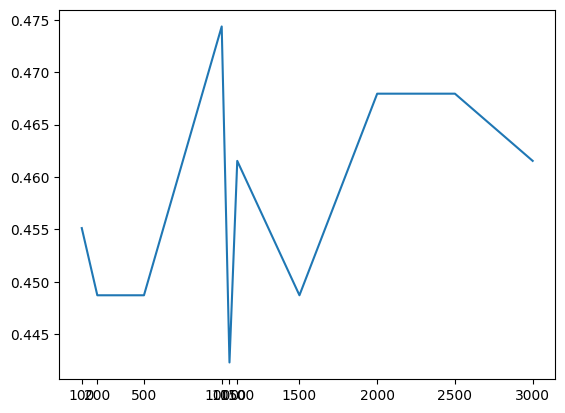

In [39]:
plt.plot(max_depth,accuracies_max_depth_tuning)
plt.xticks(max_depth)
plt.show()

In [40]:
# for min leaves range identification

accuracies_min_leaves_tuning = []
best_model_leaves = None
max_accuracy = 0
min_leaves = [2,4,6,8,10,12]
for leaves in min_leaves:

    model = RandomForestClassifier(min_samples_leaf=leaves)
    model.fit(X_train_50,y_train_50)
    y_pred = model.predict(X_validate_50)

    accuracy = accuracy_score(y_pred=y_pred,y_true=y_validate_50)
    print("Accuracy with ",leaves,' ',accuracy)

    accuracies_min_leaves_tuning.append(accuracy)
    if(accuracy > max_accuracy):
        best_model_leaves = model
        max_accuracy = accuracy

Accuracy with  2   0.44871794871794873
Accuracy with  4   0.4423076923076923
Accuracy with  6   0.44871794871794873
Accuracy with  8   0.4358974358974359
Accuracy with  10   0.4358974358974359
Accuracy with  12   0.42948717948717946


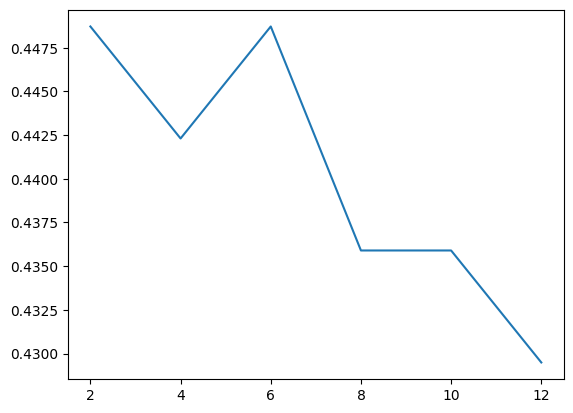

In [41]:
plt.plot(min_leaves,accuracies_min_leaves_tuning)
plt.xticks(min_leaves)
plt.show()

In [42]:
# for no of decision trees
accuracies_n_estimators = []
best_model_n_estimator = None
max_accuracy = 0
n_estimator = [10,20,50,100,200,500,1000]
for estimator in n_estimator:
    
    model = RandomForestClassifier(n_estimators=estimator)
    model.fit(X_train_50,y_train_50)
    y_pred = model.predict(X_validate_50)

    accuracy = accuracy_score(y_pred=y_pred,y_true=y_validate_50)
    print("Accuracy with ",estimator,' ',accuracy)

    accuracies_n_estimators.append(accuracy)
    if(accuracy > max_accuracy):
        best_model_n_estimator = model
        max_accuracy = accuracy

Accuracy with  10   0.38461538461538464
Accuracy with  20   0.47435897435897434
Accuracy with  50   0.5
Accuracy with  100   0.44871794871794873
Accuracy with  200   0.47435897435897434
Accuracy with  500   0.46153846153846156
Accuracy with  1000   0.4551282051282051


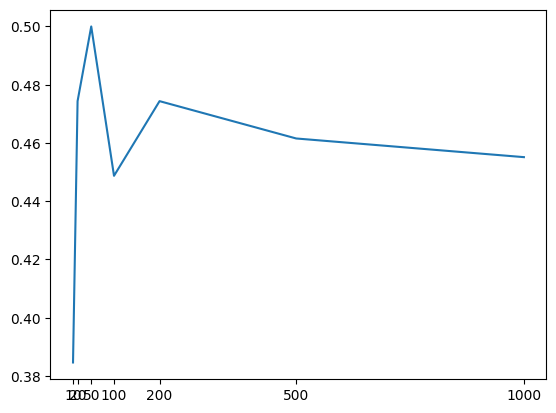

In [43]:
plt.plot(n_estimator,accuracies_n_estimators)
plt.xticks(n_estimator)
plt.show()

In [64]:
# no of max leaves
accuracies_max_leaf_nodes = []
best_model_max_leaf_nodes = None
max_accuracy = 0
max_leaf_nodes = [25,30,100,500,1000,1200]
for max_leaf_node in max_leaf_nodes:
    
    model = RandomForestClassifier(max_leaf_nodes=max_leaf_node)
    model.fit(X_train_50,y_train_50)
    y_pred = model.predict(X_validate_50)

    accuracy = accuracy_score(y_pred=y_pred,y_true=y_validate_50)
    print("Accuracy with ",max_leaf_node,' ',accuracy)

    accuracies_max_leaf_nodes.append(accuracy)
    if(accuracy > max_accuracy):
        best_model_max_leaf_nodes = model
        max_accuracy = accuracy

Accuracy with  25   0.4230769230769231
Accuracy with  30   0.4358974358974359
Accuracy with  100   0.4423076923076923
Accuracy with  500   0.46153846153846156
Accuracy with  1000   0.4935897435897436
Accuracy with  1200   0.46153846153846156


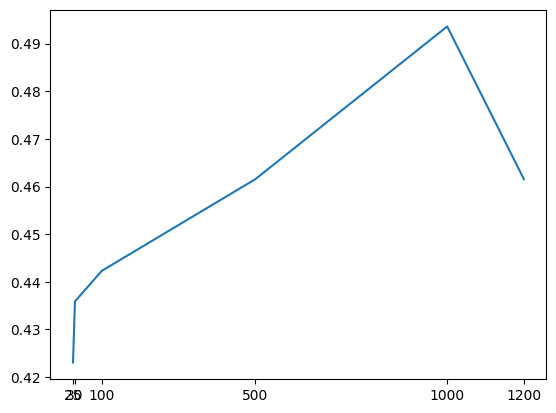

In [65]:
plt.plot(max_leaf_nodes,accuracies_max_leaf_nodes)
plt.xticks(max_leaf_nodes)
plt.show()

##### Now, Doing Grid Search in the known ranges of hyper parameters

In [66]:
X_test_50.shape

(312, 3248)

In [67]:
params = {"max_depth":[2500,2550,2450],"min_samples_leaf":[2,3],"n_estimators":[50,95,100],"max_leaf_nodes":[500,1000,1100]}

In [68]:
best_model = RandomForestClassifier()

In [46]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,verbose=2)
grid_search.fit(X_train_50,y_train_50)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=2500, max_leaf_nodes=500, min_samples_leaf=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=2500, max_leaf_nodes=500, min_samples_leaf=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=2500, max_leaf_nodes=500, min_samples_leaf=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=2500, max_leaf_nodes=500, min_samples_leaf=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=2500, max_leaf_nodes=500, min_samples_leaf=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=2500, max_leaf_nodes=500, min_samples_leaf=2, n_estimators=95; total time=   2.3s
[CV] END max_depth=2500, max_leaf_nodes=500, min_samples_leaf=2, n_estimators=95; total time=   2.0s
[CV] END max_depth=2500, max_leaf_nodes=500, min_samples_leaf=2, n_estimators=95; total time=   2.2s
[CV] END max_depth=2500, max_leaf_nodes=500, min_samples_leaf=2, n_estimators=95; total time=   2.1s
[CV] END max_depth=2500, max_

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2500, 2550, 2450],
                         'max_leaf_nodes': [500, 1000, 1100],
                         'min_samples_leaf': [2, 3],
                         'n_estimators': [50, 95, 100]},
             verbose=2)

In [69]:
print("Best hyper paramters : ",grid_search.best_params_)
print("Best Scores : ", grid_search.best_score_)

Best hyper paramters :  {'max_depth': 2450, 'max_leaf_nodes': 500, 'min_samples_leaf': 2, 'n_estimators': 50}
Best Scores :  0.4917682543672238


##### Training the best model

In [70]:
accuracies = 0
y_predicted_best_50 = None
best_model_ALL_50 = RandomForestClassifier(max_depth=2500,n_estimators=95,min_samples_leaf = 2,max_leaf_nodes=500)

for iter in range(5):
    
    best_model_ALL_50.fit(X_train_50,y_train_50)
    y_predicted_best_50 = best_model_ALL_50.predict(X_test_50)
    best_accuracy = round(accuracy_score(y_true=y_test_50,y_pred = y_predicted_best_50),2)*100
    accuracies+=best_accuracy
    print("Accuracy: ",best_accuracy)
print("Mean Accuracy :",round(accuracies/5,2))

Accuracy:  42.0
Accuracy:  44.0
Accuracy:  42.0
Accuracy:  42.0
Accuracy:  41.0
Mean Accuracy : 42.2


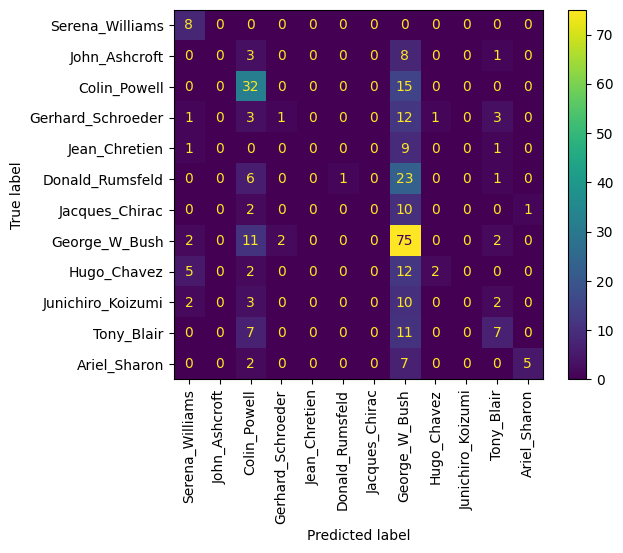

In [40]:
import joblib
m = joblib.load("model_all_Random_Forest.joblib")
y_predicted_best_50 = m.predict(X_test_50)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test_50,y_pred=y_predicted_best_50,labels=pd.DataFrame(y_test_50)[0].unique()),display_labels=pd.DataFrame(y_test_50)[0].unique())
disp.plot(xticks_rotation="vertical")

In [71]:
accuracies = 0
y_predicted_best_50 = None
best_model_ALL_50 = RandomForestClassifier(max_depth=2500,n_estimators=95,min_samples_leaf = 2,max_leaf_nodes=500)
for iter in range(5):
    
    best_model_ALL_50.fit(X_train_50,y_train_50)
    y_predicted_best_50 = best_model_ALL_50.predict(X_test_50)
    best_accuracy = round(accuracy_score(y_true=y_test_50,y_pred = y_predicted_best_50),2)*100
    accuracies+=best_accuracy
    print("Accuracy: ",best_accuracy)
print("Mean Accuracy :",round(accuracies/5,2))

Accuracy:  43.0
Accuracy:  43.0
Accuracy:  41.0
Accuracy:  43.0
Accuracy:  42.0
Mean Accuracy : 42.4


Saving it to use in demo code

In [72]:
import joblib
joblib.dump(best_model_ALL_50,'model_all_Random_Forest.joblib')

['model_all_Random_Forest.joblib']

Testing it on CNN features to get the best outcome

In [52]:
accuracies = 0
for iter in range(5):
    best_model_CNN_50 = RandomForestClassifier(max_depth=2500,n_estimators=95,min_samples_leaf = 2,max_leaf_nodes=500)
    best_model_CNN_50.fit(X_train_CNN,y_train_CNN)
    y_predicted_best = best_model_CNN_50.predict(X_test_CNN)
    best_accuracy = round(accuracy_score(y_true=y_test_CNN,y_pred = y_predicted_best),2)*100
    accuracies+=best_accuracy
    print("Accuracy: ",best_accuracy)
print("Mean Accuracy: ",round(accuracies/5,2))

Accuracy:  46.0
Accuracy:  46.0
Accuracy:  48.0
Accuracy:  47.0
Accuracy:  46.0
Mean Accuracy:  46.6


In [53]:
pd.DataFrame(y_test_50)[0].unique()

array(['Serena_Williams', 'John_Ashcroft', 'Colin_Powell',
       'Gerhard_Schroeder', 'Jean_Chretien', 'Donald_Rumsfeld',
       'Jacques_Chirac', 'George_W_Bush', 'Hugo_Chavez',
       'Junichiro_Koizumi', 'Tony_Blair', 'Ariel_Sharon'], dtype=object)

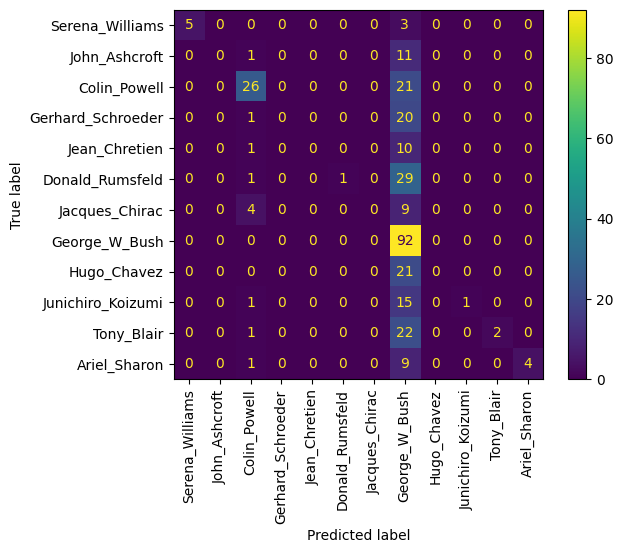

In [54]:
confusionmatrix = confusion_matrix(y_pred=y_predicted_best_50,y_true=y_test_CNN,labels = pd.DataFrame(y_test_50)[0].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix,display_labels = pd.DataFrame(y_test_50)[0].unique())
disp.plot(xticks_rotation="vertical")

##### If Minimum number of samples per class is increased to 70

In [55]:
df_modified_70 = df[df[0].map(df[0].value_counts()) >= 70]

In [56]:
Features_70 = df_modified_70.drop(0,axis=1)
target_70 = df_modified_70[0]

Features_HoG_95_70 = Features_70.loc[:,:946]
Features_CNN_70 = Features_70.loc[:,946:2993]
Features_LBP_70  = Features_70.loc[:,2993:]

Default Hyper parameters training for LBP Features

In [57]:
X_train_LBP_70,X_test_LBP_70,y_train_LBP_70,y_test_LBP_70 = train_test_split(Features_LBP_70,target_70,train_size=0.8,random_state=42)

In [58]:
model_LBP_default_70 = RandomForestClassifier()

In [59]:
model_LBP_default_70.fit(X_train_LBP_70,y_train_LBP_70)

RandomForestClassifier()

In [60]:
y_predicted_LBP_70 = model_LBP_default_70.predict(X_test_LBP_70)

In [61]:
print(accuracy_score(y_true = y_test_LBP_70,y_pred = y_predicted_LBP_70))

0.4418604651162791


Default Hyper parameters training for CNN Features

In [77]:
X_train_CNN_70,X_test_CNN_70,y_train_CNN_70,y_test_CNN_70 = train_test_split(Features_CNN_70,target_70,train_size=0.8,random_state=42)

In [78]:
model_CNN_default_70 = RandomForestClassifier()
model_CNN_default_70.fit(X_train_CNN_70,y_train_CNN_70)

RandomForestClassifier()

In [79]:
y_predicted_CNN_70 = model_CNN_default_70.predict(X_test_CNN_70)
print(accuracy_score(y_true=y_test_CNN_70,y_pred = y_predicted_CNN_70))

0.5891472868217055


Default Hyper parameters training for HoG Features covering 0.95 Variance

In [80]:
X_train_HoG_70,X_test_HoG_70,y_train_HoG_70,y_test_HoG_70 = train_test_split(Features_HoG_95_70,target_70,train_size=0.8,random_state=42)

In [81]:
model_HoG_default_70 = RandomForestClassifier()
model_HoG_default_70.fit(X_train_HoG_70,y_train_HoG_70)

RandomForestClassifier()

In [82]:
y_predicted_HoG_70 = model_HoG_default_70.predict(X_test_HoG_70)
print(accuracy_score(y_true=y_test_HoG_70,y_pred=y_predicted_HoG_70))

0.4069767441860465


Concatenating All Features and training the model

In [83]:
X_train_70,X_test_70,y_train_70,y_test_70 = train_test_split(Features_70,target_70,train_size=0.8,random_state=42)

In [101]:
model_ALL_default_70 = RandomForestClassifier()
model_ALL_default_70.fit(X_train_70,y_train_70)
y_predicted_ALL_70 = model_ALL_default_70.predict(X_test_70)
print(accuracy_score(y_true=y_test_70,y_pred=y_predicted_ALL_70))

0.5503875968992248


Grid Search using initial range itself

In [389]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,verbose=2)
grid_search.fit(X_train_70,y_train_70)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=2500, max_leaf_nodes=300, min_samples_leaf=2, n_estimators=95; total time=   4.4s
[CV] END max_depth=2500, max_leaf_nodes=300, min_samples_leaf=2, n_estimators=95; total time=   4.0s
[CV] END max_depth=2500, max_leaf_nodes=300, min_samples_leaf=2, n_estimators=95; total time=   4.1s
[CV] END max_depth=2500, max_leaf_nodes=300, min_samples_leaf=2, n_estimators=95; total time=   3.5s
[CV] END max_depth=2500, max_leaf_nodes=300, min_samples_leaf=2, n_estimators=95; total time=   3.0s
[CV] END max_depth=2500, max_leaf_nodes=300, min_samples_leaf=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=2500, max_leaf_nodes=300, min_samples_leaf=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=2500, max_leaf_nodes=300, min_samples_leaf=2, n_estimators=100; total time=   3.0s
[CV] END max_depth=2500, max_leaf_nodes=300, min_samples_leaf=2, n_estimators=100; total time=   3.0s
[CV] END max_depth=2500, 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2500, 2550, 2450],
                         'max_leaf_nodes': [300, 500, 1000, 1100],
                         'min_samples_leaf': [2, 3],
                         'n_estimators': [95, 100]},
             verbose=2)

In [391]:
print("Best Parameters: ",grid_search.best_params_)
print("Best Score: ",grid_search.best_score_)

Best Parameters:  {'max_depth': 2450, 'max_leaf_nodes': 300, 'min_samples_leaf': 2, 'n_estimators': 100}
Best Score:  0.549514563106796


Best Model training and Mean Accuracy

In [392]:
accuracies = 0
for iter in range(5):
    best_model_ALL_70 = RandomForestClassifier(max_depth=2450,n_estimators=100,min_samples_leaf = 2,max_leaf_nodes=300)
    best_model_ALL_70.fit(X_train_70,y_train_70)
    y_predicted_best_70 = best_model_ALL_70.predict(X_test_70)
    best_accuracy = round(accuracy_score(y_true=y_test_70,y_pred = y_predicted_best_70),2)*100
    accuracies+=best_accuracy
    print("Accuracy: ",best_accuracy)
print("Mean Accuracy :",round(accuracies/5,2))

Accuracy:  55.00000000000001
Accuracy:  53.0
Accuracy:  54.0
Accuracy:  53.0
Accuracy:  53.0
Mean Accuracy : 53.6


CNN features training

In [396]:
accuracies = 0
for iter in range(5):
    best_model_CNN_70 = RandomForestClassifier(max_depth=2450,n_estimators=100,min_samples_leaf = 2,max_leaf_nodes=300)
    best_model_CNN_70.fit(X_train_CNN_70,y_train_CNN_70)
    y_predicted_best = best_model_CNN_70.predict(X_test_CNN_70)
    best_accuracy = round(accuracy_score(y_true=y_test_CNN_70,y_pred = y_predicted_best),2)*100
    accuracies+=best_accuracy
    print("Accuracy: ",best_accuracy)
print("Mean Accuracy :",round(accuracies/5,2))

Accuracy:  57.99999999999999
Accuracy:  56.99999999999999
Accuracy:  59.0
Accuracy:  55.00000000000001
Accuracy:  60.0
Mean Accuracy : 57.8


In [397]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true = y_test_CNN_70,y_pred=y_predicted_best))

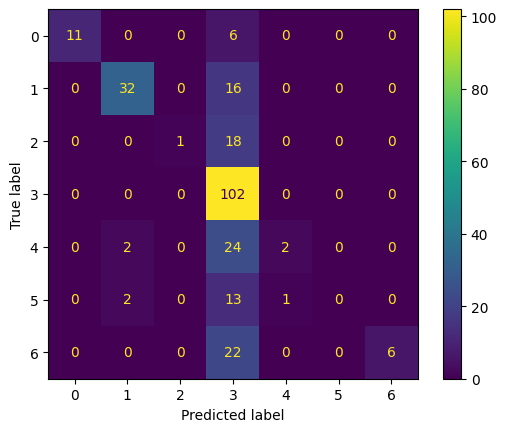

In [398]:
disp.plot()

#### Random Landscape

In [39]:
# Ensemble of Forests
class RandomLandscape:

    def __init__(self,no_of_random_forests = 5,bagging = True):
        
        self.__models = []
        self.no_of_forests = no_of_random_forests
        self.bag_size = 0
        self.bagging = bagging
        self.bags = None
    
    def fit(self,X,y):

        bags = self.get_bags(X,y)
        self.bags = bags

        for forest_no in range(self.no_of_forests):
            
            model = RandomForestClassifier()
            if(bags!= []):
                model.fit(bags[forest_no],y)
            else:
                model.fit(X,y)
            self.__models.append(model)

        return self
    
    def predict(self,X_test):
        y_predicted = []

        y_preds = []

        for number,model in enumerate(self.__models):
            x_test = X_test
            if(self.bagging):
                x_test = X_test.loc[:,self.bags[number].columns]
            y_pred = model.predict(x_test)
            y_preds.append(y_pred)
        
        y_preds = np.array(y_preds)
        
        for prediction_per_sample in range(len(y_preds[0])):

            y_prediction = list(y_preds[:,prediction_per_sample])
            max_count = 0
            final_class = ''

            for element in y_prediction:
                count = y_prediction.count(element)
                if count > max_count:
                    max_count = count
                    final_class = element
                    
            y_predicted.append(final_class)

        return y_predicted


    def get_bags(self,X,y):
        bags = []

        

        if self.bagging:
            selected_features = []
            self.bag_size = X.shape[1]//self.no_of_forests + 1
            while len(bags)!=  self.no_of_forests:
                bag = []
                while len(bag)!=self.bag_size and len(selected_features)!= X.shape[1]:
                    column = np.random.randint(X.columns.min(),X.columns.max()+1)
                    if column not in bag and column not in selected_features:
                        bag.append(column)
                        selected_features.append(column)
                        
            
                bag_sample = X.loc[:,bag]
                bags.append(pd.DataFrame(bag_sample))
                   
        return bags

In [45]:
params = {'n_estimators':[50,100,150,200,250,300,500]}

In [51]:
from sklearn.ensemble import AdaBoostClassifier

model_boost = AdaBoostClassifier(estimator=RandomForestClassifier(),random_state=42)
model_boost.fit(X_train_50,y_train_50)
y_pred = model.predict(X_test_50)
accuracy = round(accuracy_score(y_pred = y_pred,y_true=y_test_50),2)*100
accuracy

c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


42.0

In [47]:
grid_search = GridSearchCV(param_grid=params,estimator=model_boost,verbose=3)
grid_search.fit(X_train_50,y_train_50)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END ...................n_estimators=50;, score=0.507 total time=   4.9s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END ...................n_estimators=50;, score=0.484 total time=   4.6s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END ...................n_estimators=50;, score=0.463 total time=   4.4s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END ...................n_estimators=50;, score=0.505 total time=   4.5s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END ...................n_estimators=50;, score=0.472 total time=   4.1s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END ..................n_estimators=100;, score=0.507 total time=   4.3s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END ..................n_estimators=100;, score=0.484 total time=   4.4s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END ..................n_estimators=100;, score=0.463 total time=   4.6s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END ..................n_estimators=100;, score=0.505 total time=   4.4s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END ..................n_estimators=100;, score=0.472 total time=   3.7s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END ..................n_estimators=150;, score=0.507 total time=   3.9s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END ..................n_estimators=150;, score=0.484 total time=   4.2s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END ..................n_estimators=150;, score=0.463 total time=   4.0s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END ..................n_estimators=150;, score=0.505 total time=   4.2s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END ..................n_estimators=150;, score=0.472 total time=   4.2s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END ..................n_estimators=200;, score=0.507 total time=   4.0s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END ..................n_estimators=200;, score=0.484 total time=   4.0s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END ..................n_estimators=200;, score=0.463 total time=   4.3s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END ..................n_estimators=200;, score=0.505 total time=   4.2s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END ..................n_estimators=200;, score=0.472 total time=   3.9s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END ..................n_estimators=250;, score=0.507 total time=   4.1s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END ..................n_estimators=250;, score=0.484 total time=   4.3s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END ..................n_estimators=250;, score=0.463 total time=   4.8s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END ..................n_estimators=250;, score=0.505 total time=   4.3s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END ..................n_estimators=250;, score=0.472 total time=   4.2s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END ..................n_estimators=300;, score=0.507 total time=   4.2s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END ..................n_estimators=300;, score=0.484 total time=   4.2s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END ..................n_estimators=300;, score=0.463 total time=   4.2s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END ..................n_estimators=300;, score=0.505 total time=   4.1s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END ..................n_estimators=300;, score=0.472 total time=   4.5s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END ..................n_estimators=500;, score=0.507 total time=   5.5s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END ..................n_estimators=500;, score=0.484 total time=   6.0s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END ..................n_estimators=500;, score=0.463 total time=   5.2s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END ..................n_estimators=500;, score=0.505 total time=   5.0s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END ..................n_estimators=500;, score=0.472 total time=   5.3s


c:\Users\sumee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(estimator=AdaBoostClassifier(estimator=RandomForestClassifier(),
                                          random_state=42),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300, 500]},
             verbose=3)

In [48]:
print("Best Parameters: ",grid_search.best_params_)
print("Best score: ",grid_search.best_score_)

Best Parameters:  {'n_estimators': 50}
Best score:  0.48624691047714796


In [355]:
accuracies = 0
for iter in range(5):
    model_random_landscape = RandomLandscape(no_of_random_forests=15)
    model_random_landscape.fit(X_train_50,y_train_50)
    y_pred = model_random_landscape.predict(X_test_50)
    accuracy = accuracy_score(y_pred = y_pred,y_true=y_test_50)
    print("Accuracy : ",accuracy)
    accuracies+=accuracy
print("Mean Accuracy : ",accuracies/5)

Accuracy :  0.36217948717948717
Accuracy :  0.3717948717948718
Accuracy :  0.3685897435897436
Accuracy :  0.3525641025641026
Accuracy :  0.3557692307692308
Mean Accuracy :  0.3621794871794872


In [358]:
accuracies = 0
for iter in range(5):
    model_random_landscape = RandomLandscape(no_of_random_forests=15)
    model_random_landscape.fit(X_train_CNN,y_train_CNN)
    y_pred = model_random_landscape.predict(X_test_CNN)
    accuracy = accuracy_score(y_pred = y_pred,y_true=y_test_CNN)
    print("Accuracy : ",accuracy)
    accuracies+=accuracy
print("Mean Accuracy : ",accuracies/5)

Accuracy :  0.38461538461538464
Accuracy :  0.3717948717948718
Accuracy :  0.3782051282051282
Accuracy :  0.375
Accuracy :  0.38782051282051283
Mean Accuracy :  0.37948717948717947
